Title of the project: Fashion-MNIST items' classification project
objectives: Encounter the used packages and modules in order to classify the 10 categories of the Fashion MNIST dataset. This classification will be performed using five different algorithms. so what is classification ? 
In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data.

Examples of classification problems include:

1. Given an example, classify if it is spam or not.
2. Given a handwritten character, classify it as one of the known characters.
3. Given recent user behavior, classify as churn or not.
From a modeling perspective, classification requires a training dataset with many examples of inputs and outputs from which to learn.

A model will use the training dataset and will calculate how to best map examples of input data to specific class labels. As such, the training dataset must be sufficiently representative of the problem and have many examples of each class label.
there are four main classifiaction categories : 
1. Binary Classification
2. Multi-Class Classification
3. Multi-Label Classification
4. Imbalanced Classification
the used dataset: In the following, we will be using (as the title suggested) the Modified National Institute of Standards and Technology dataset of fashion, which we will, from now on, be referring to as MNIST Fashion dataset. Curious and need to know more about this dataset, alright! Briefly,Fashion-MNIST is a dataset of Zalando’s fashion article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each instance is a 28×28 grayscale image, associated with a label. In case you want to download or have more questions, you can check out the link https://github.com/zalandoresearch/fashion-mnist .
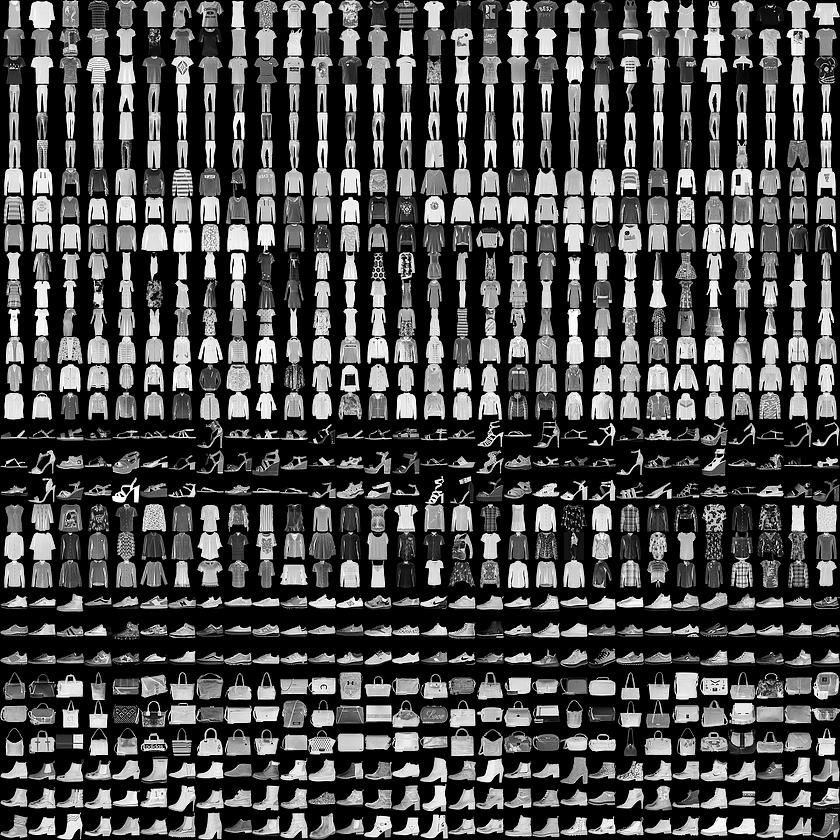

Here we will start implementing our project step by step. The project consists of a main task which is to classify items in the Fashion MNIST dataset successfully. 
We will divide the implementation course of two main parts, one which we will be doing just for once and we won’t need to rewrite the code for it every time we run the whole code. The second part, which will contain the different models we will be using in this project mainly: Convolutional Neural Networks (CNN), Multi-Layer Perceptron (MLP), Single Layer Perceptron (SLP), VGG16, ResNet, Gaussian Mixture Model and Clustering more specifically we are going to use K-means Clustering techniques. To have more fun! We will apply these models on processed data before and after applying Principal Component Analysis (PCA). 

Part 1: Preprocessing the Fashion MNIST dataset 

Step 1: Importing necessary packages 
at this step, we will need packages to upload the dataset (here unlike the Boston and Breast cancer dataset we won’t use sklearn but instead we will be using keras), to explore the dataset, to process the data (also do NOT forget that the data is a collection of images of certain size which will require special processing unlike what we have seen in the Boston and Breast cancer databases), also packages to build the needed models and to visualize and assess the performance of these models and optimize it. 
Before this, you will need your python 3.x version installed (You can check out the link https://realpython.com/installing-python/ ) and necessary libraries and packages installed (https://www.tensorflow.org/install/pip and https://www.activestate.com/blog/top-10-python-machine-learning-packages/ )


In [ ]:
import tensorflow #It is an open source artificial intelligence library, using data flow graphs to build models. 
#It allows developers to create large-scale neural networks with many layers. 
#TensorFlow is mainly used for: Classification, Perception, Understanding, Discovering, Prediction and Creation.
import numpy as np #library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
import pandas as pd # used to analyze data.
from time import time
from keras.utils.layer_utils import get_source_inputs
from keras.initializers import VarianceScaling
from tensorflow.keras import Input
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt #this is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. 
import keras #an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.
from keras.datasets import mnist #provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples.
from keras.preprocessing import image #provides utilities for working with image data
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img #these functions are imported to process the images 
from keras.models import Sequential, Model, load_model #this allow us to download into the workspace models from keras 
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, Convolution2D, MaxPool2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, UpSampling2D#load already predifined layers 
from numpy.random import permutation #The random is a module present in the NumPy library. This module contains the functions which are used for generating random numbers. 
#This module contains some simple random data generation methods, here we are using the permutation method.
from keras import optimizers #loads optimizers packge from the keras platform 
from tensorflow.keras.optimizers import SGD, Adam #here we are specifying which optimizers we are using: Stochastic Gradient Descent (SGD) and Adam.
from keras import backend as K
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping#A callback is an object that can perform actions at various stages of training 
#(at the start or end of an epoch, before or after a single batch). ModelCheckpoint callback is used in conjunction with training using model.fit() 
#to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.
#ReduceLROnPlateau help Reduce learning rate when a metric has stopped improving. Early stopping help Stop training when a monitored metric has stopped improving.
from tensorflow.keras.utils import to_categorical#Converts a class vector (integers) to binary class matrix.
from keras.utils import np_utils #this helps to load functions to scale arrays by integer multiples (without interpolation)
from sklearn.model_selection import train_test_split#this Splits arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, plot_confusion_matrix, roc_auc_score, roc_curve# this will helps us load
#predifined metrics t evalute the classification models we are using here. 
from keras.wrappers.scikit_learn import KerasClassifier #Implementation of the scikit-learn classifier API for Keras.
from sklearn.model_selection import GridSearchCV #this library function that is a member of sklearn's model_selection package. 
#It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set.
from sklearn.preprocessing import StandardScaler #standardizes a feature by subtracting the mean and then scaling to unit variance. 
#Unit variance means dividing all the values by the standard deviation.
from sklearn.cluster import KMeans, MiniBatchKMeans #K-Means clustering. The number of clusters to form as well as the number of centroids to generate. 
#Method for initialization: 'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
from sklearn.decomposition import PCA# this will import the Principle Component Anaysis to reduce dataset dimentionaly, we will be using further in the code.

In [ ]:
"""
This just to read and it is very important that why i didn t include in comments ! Do not execute . 
here am supporting with more knowledge of how to build keras models. There are two ways to build Keras models: sequential and functional.
The sequential API allows you to create models layer-by-layer for most problems.
 It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.
Alternatively, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. 
In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.

for more details visit : https://machinelearningmastery.com/keras-functional-api-deep-learning/
                         https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/
                         https://www.tensorflow.org/guide/keras/functional
                         https://www.tensorflow.org/guide/keras/sequential_model
ENJOY THE REST OF THE CODE !!
"""

Step2: Writing necessary "callback" functions so we will have in our hands an already predefined tools that we can use further in our code. 
Fashion MNIST Training dataset consists of 60,000 images and each image has 784 features (i.e. 28×28 pixels). Each pixel is a value from 0 to 255, describing the pixel intensity. 0 for white and 255 for black. As shown in figure blow, there ten labels for each class. Going from 0 to 9. 
We already have the splitted dataset (training and test) available in ratio 85:15 (60,000:10,000) from Zalando Research, of course you can change the partition of the current splitting of the dataset or keep it as it is. Now as we have read the data, we will process it, to do this we will: 
1. Shuffle the dataset.
2. Normalize it.
We shuffle the training dataset to get uniform samples for cross-validation. This also ensures that we don’t miss out any digit in a cross-validation fold.
Each image (instance) in the dataset has 784 pixels (features) and value of each feature(pixel) ranges from 0 to 255, this range is too wide, hence we have performed Normalization on the training and test dataset, by dividing the pixels by 255, so that values of all features (pixels) are in a small range (0 to 1).
In case this is your first time coming across with these terms you can always check these links: https://www.w3schools.com/python/ref_random_shuffle.asp and https://support.snapfish.com/hc/en-us/articles/226562467-Shuffle-photos-on-a-book-or-calendar-page-and-other-products and https://stackoverflow.com/questions/28615864/shuffling-images-in-python and https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/ and https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/ .

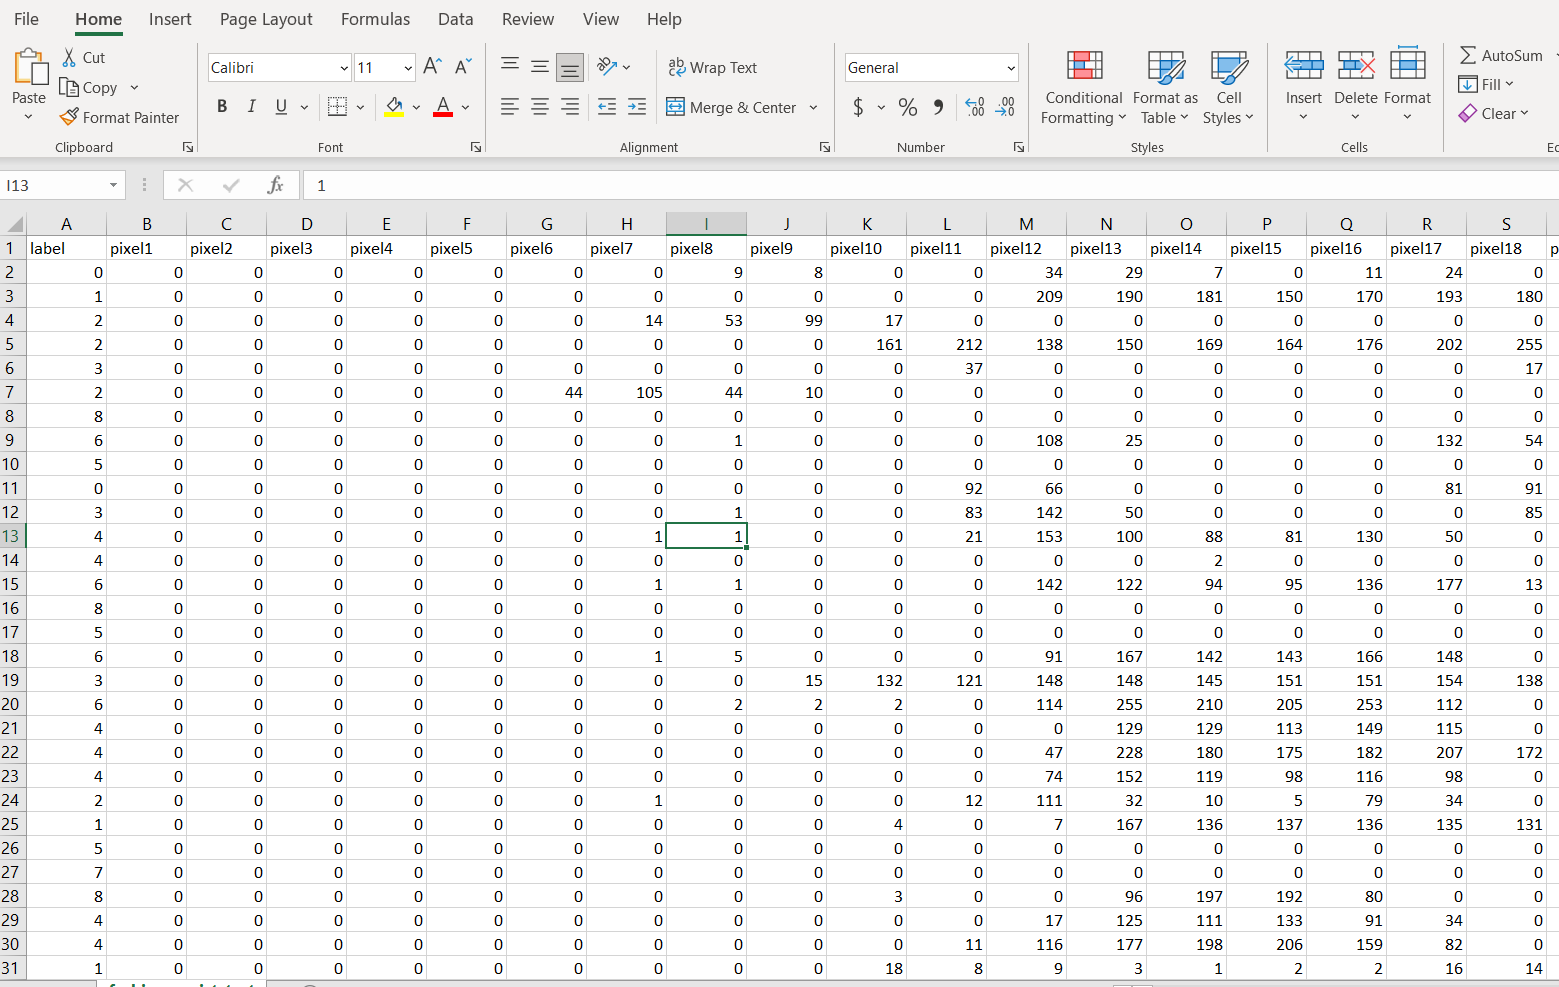


In [ ]:
# this function will load the data. Remember that the dataset is splitted into trainig set and testing set. 
# this "def load_data" function will return the dataset into shapes. The function "shape" returns the shape of an array. The shape is a tuple of integers. 
#These numbers denote the lengths of the corresponding array dimension. 
#In other words: The "shape" of an array is a tuple with the number of elements per axis (dimension). the main goal here is to transform numerical pixel values into images
def load_data(keras_datasets, first_layer="dense", channels=1, plot_images=False, class_names=[]):
    (x_train, y_train), (x_test, y_test) = keras_datasets.load_data()
    print('Before reshape - X_train.shape:', x_train.shape)
    print('Before reshape - X_test.shape:', x_test.shape)
    height=x_train.shape[1]
    width=x_train.shape[2]        
    # flatten 28*28 images to a 784 vector for each image
    num_pixels = height * width
    # plot images
    if plot_images:
        plot_images_with_labels(x_train, y_train, height, width, class_names, 25)
    
    if first_layer == "dense":
        # convert shape of x_train from (60000, 28, 28) to (60000, 784) - 784 columns per row        
        X_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32')
        X_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32')        
    elif first_layer == "conv2d":
        # Select class 6 images (class 6)
        # x_train = x_train[y_train.flatten() == 6]
        X_train = x_train.reshape((x_train.shape[0], height, width, channels)).astype('float32')
        X_test = x_test.reshape((x_test.shape[0], height, width, channels)).astype('float32')        
        print((x_train.shape[0],) + (height, width, channels))        
        
    print('After reshape - X_train.shape:', X_train.shape)
    print('After reshape - X_test.shape:', X_test.shape)
    print('Before rescaling:', X_train[0])

    #normalize the values between 0 and 1

    X_train = (X_train.astype(np.float32))/255
    X_test = (X_test.astype(np.float32))/255
    print('After rescaling:', X_train[0])
              
    #convert labels to categorical/dummy encoding so that we can use simple "categorical_crossentropy" as loss.

    print('Class label of first image before converting to categorical:', y_train[0])

    # one hot encode outputs

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    print('Total number of classes:', num_classes)
    print('Class label of first image after converting to categorical:', y_train[0])
              
    return (X_train, y_train, X_test, y_test, height, width)
#The "def plot_images_with_labels" will plot the images of the different items of the dataset. This as you already seen after shuffling and normalizing these values. 
def plot_images_with_labels(X, y, img_height, img_width, class_names, nb_count=25):
    plt.figure(figsize=(10, 10))
    for i in range(nb_count):
        plt.subplot(np.sqrt(nb_count), np.sqrt(nb_count), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i].reshape((img_height,img_width)), cmap=plt.get_cmap('gray'))        
        label_index = int(y[i])
        plt.title(class_names[label_index])
    plt.show()

def train_model(model, X_train, y_train, X_valid=None, y_valid=None, validation_split=0.20, data_aug = False, best_model_name='best_model.h5', epochs=50, batch_size=512,verbose=1):
    #Stop training when a monitored metric has stopped improving.
    er = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=verbose)
    #ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, 
    #so the model or weights can be loaded later to continue the training from the state saved.
    cp = ModelCheckpoint(filepath = best_model_name, save_best_only = True,verbose=verbose)
    callbacks = [cp, er]
    #lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_delta=0.0001)


#here you will find a very amazing in machine learning that you will encounter evry time dataset are 1. not big enough for the learning of the algorithms or 2. 
#dataset does not contain enough "diversity" to avoid biased learning. so what is data augmentation? 


#Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. 
#It acts as a regularizer and helps reduce overfitting when training a machine learning model.
   
    if not data_aug and X_valid is not None:  
        print('Training without data augmentation...')
        history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=verbose, callbacks=callbacks, validation_data=(X_valid,y_valid))
        return history
    elif not data_aug and X_valid is None:
        print('Training without data augmentation...')
        history = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs, verbose=verbose, shuffle=True, callbacks=callbacks, validation_split=validation_split)
        return history
    else:
        print('Training with data augmentation...')
        train_datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
        train_set_ae = train_datagen.flow(X_train, y_train, batch_size=batch_size)

        validation_datagen = ImageDataGenerator()
        validation_set_ae = validation_datagen.flow(X_valid, y_valid, batch_size=batch_size)
        
        history = model.fit_generator(train_set_ae,
                                           epochs=epochs,
                                           steps_per_epoch=np.ceil(X_train.shape[0]/batch_size),
                                           verbose=verbose, callbacks=callbacks,
                                           validation_data=(validation_set_ae),
                                           validation_steps=np.ceil(X_valid.shape[0]/batch_size))
        
        return history
  #the plot_loss_and_metrics function collects the used metrics to evaluate our classifiaction techniques. here I used three main metrics: 
  #1. the accuracy , 2. the mean absolute error and 3. mean squared error. the code bloc blow illustrates how this is done: 
def plot_loss_and_metrics(history, plot_loss_only= False, metrics=['acc']):
    fig, axes = plt.subplots(nrows=1, ncols=len(metrics)+1, figsize=(20, 4))
    axes[0].plot(history.history['loss'])
    axes[0].plot(history.history['val_loss'])
    axes[0].set_title('Model Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='lower right')    
        
    if not plot_loss_only:
        axes[1].plot(history.history['acc'])
        axes[1].plot(history.history['val_acc'])
        axes[1].set_title('Model Accuracy')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].legend(['Train', 'Val'], loc='lower right')  
        
        if 'mae' in metrics:
            axes[2].plot(history.history['mae'])
            axes[2].plot(history.history['val_mae'])
            axes[2].set_title('Model Mean Absolute Error')
            axes[2].set_ylabel('Mean Absolute Error')
            axes[2].set_xlabel('Epoch')
            axes[2].legend(['Train', 'Val'], loc='lower right') 
        if 'mse' in metrics:
            axes[3].plot(history.history['mse'])
            axes[3].plot(history.history['val_mse'])
            axes[3].set_title('Model Mean Squared Error')
            axes[3].set_ylabel('Mean Squared Error')
            axes[3].set_xlabel('Epoch')
            axes[3].legend(['Train', 'Val'], loc='lower right')
            
    plt.show()
"""
the functions blow are functions I used in order to visualize the evaluation metrics calculated above. how? 
using the ROC curve, confusion matrix and report metrics. u can find links in order to have more information about these concepts below: 
link 1: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20(receiver%20operating,False%20Positive%20Rate
link 2: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
link 3: https://metricswatch.com/what-is-metrics-reporting/#:~:text=Metrics%20reporting%20is%20how%20you,track%20to%20meet%20your%20goals. 
"""
def plot_roc_curve(fpr,tpr): 
  import matplotlib.pyplot as plt
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()  
    
def load_evaluate_predict(fileName, X_test, y_test, nb_round=0, print_first=1, metrics=['acc']):

    #load best model, evaluate and predict on unseen data    

    best_model = load_model(fileName)
    results = best_model.evaluate(X_test, y_test)    
    print('Test loss = {}'.format(np.round(results[0], 2)))
    print('Test accuracy = {}'.format(np.round(results[1], 2)))
    if len(metrics)>1:
        print('Test ' + metrics[1] + '= {}'.format(np.round(results[2], 2)))
        print('Test ' + metrics[2] + '= {}'.format(np.round(results[3], 2)))

    y_pred_proba = best_model.predict(X_test)
    for i in range(print_first):
        print('')
        print("   Actual:", y_test[i])
        print('Predicted:', np.round(y_pred_proba[i], nb_round))
    
    return best_model, y_pred_proba

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import matplotlib.pyplot as plt
    import itertools
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    
def report_metrics(y_test, y_pred, y_pred_proba, classes, multiclass=False):
    #confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    plot_confusion_matrix(cnf_matrix, classes=classes, title="Confusion matrix")
    plt.show()

    #classification report
    print('classification report:\n', classification_report(y_test, y_pred))
    
    if not multiclass:
        #calculate the roc auc score
        auc = roc_auc_score(y_test, y_pred_proba)
        print('AUC: %.3f' % auc)
    
        #plot the roc curve
        fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_proba)
        print('ROC curve:\n')
        plot_roc_curve(fpr_keras, tpr_keras)

In [ ]:
# Here we are defining the training variables of the different models. Class_Names defining the labels of the different categories.
NUM_CLASSES=10
CLASS_NAMES = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
EPOCHS=50
BATCH_SIZE=1000
CHANNELS=1
VERBOSE=1
METRICS=['acc']

4431872/4422102 [==============================] - 0s 0us/step
Before reshape - X_train.shape: (60000, 28, 28)
Before reshape - X_test.shape: (10000, 28, 28)


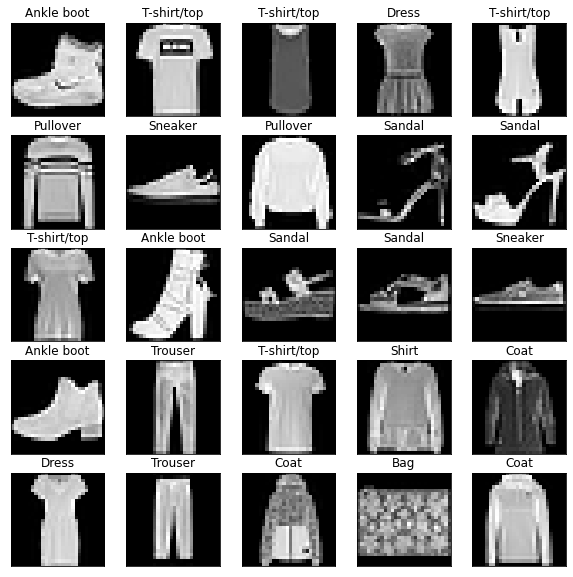

After reshape - X_train.shape: (60000, 784)
After reshape - X_test.shape: (10000, 784)
Before rescaling: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.  13.  73.   0.   0.   1.   4.   0.   0.   0.   0.   1.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.
  36. 136. 127.  62.  54.   0.   0.   0.   1.   3.   4.   0.   0.   3.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.
 102. 204. 176. 134. 144. 123.  23.   0.   0.   0.   0.  12.  10.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   

In [ ]:
X_train, y_train, X_test, y_test, IMG_HEIGHT, IMG_WIDTH = load_data(keras.datasets.fashion_mnist, first_layer="dense", channels=1, plot_images=True, class_names=CLASS_NAMES)

In [ ]:
X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn, IMG_HEIGHT, IMG_WIDTH = load_data(keras.datasets.fashion_mnist, first_layer="conv2d", channels=1, plot_images=False)

Before reshape - X_train.shape: (60000, 28, 28)
Before reshape - X_test.shape: (10000, 28, 28)
(60000, 28, 28, 1)
After reshape - X_train.shape: (60000, 28, 28, 1)
After reshape - X_test.shape: (10000, 28, 28, 1)
Before rescaling: [[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
X_train_cnn, X_valid_cnn, y_train_cnn, y_valid_cnn = train_test_split(X_train_cnn, y_train_cnn, test_size=0.20, random_state=42)

PART 2: Build the models. We will use GridSearchCV functionality from sklearn to find the optimal parameter for our model. We will provide our baseline model (named rf_grids), scoring method (in our case we will use recall as explained before), and also various parameters value we want to try with our model. The GridSearchCV function will then iterate through each parameters combination to find the best scoring parameters.
1. Single Layer Perceptron 
2. Multi-Layer Perceptron 
3. Convolutional Neural Network 
4. Kmeans (Clustering)
6. Resnet
7. Gaussian Mixture Model
For understanding single layer perceptron, it is important to understand Artificial Neural Networks (ANN). Artificial neural networks is the information processing system the mechanism of which is inspired with the functionality of biological neural circuits. An artificial neural network possesses many processing units connected to each other. Following is the schematic representation of artificial neural network −
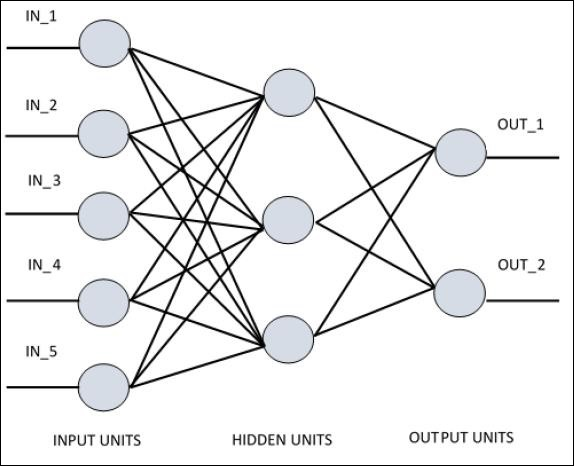
The diagram shows that the hidden units communicate with the external layer. While the input and output units communicate only through the hidden layer of the network.
The pattern of connection with nodes, the total number of layers and level of nodes between inputs and outputs with the number of neurons per layer define the architecture of a neural network.
There are two types of architecture. These types focus on the functionality artificial neural networks as follows −
**Single Layer Perceptron :Single layer perceptron is the first proposed neural model created. The content of the local memory of the neuron consists of a vector of weights. The computation of a single layer perceptron is performed over the calculation of sum of the input vector each with the value multiplied by corresponding element of vector of the weights. The value which is displayed in the output will be the input of an activation function. 
**Multi-Layer Perceptron: Multi-Layer perceptron defines the most complicated architecture of artificial neural networks. It is substantially formed from multiple layers of perceptron.
You can have more information visiting the amazing documentary: https://www.tutorialspoint.com/tensorflow/index.htm


1. Single Layer Perceptron: 

In [ ]:
#create single layer network called perceptron
def build_slp_model(height, width, nb_classes, metrics):
    model = keras.models.Sequential()
#     model.add(keras.layers.Flatten(input_shape=(height, width)))
    model.add(keras.layers.Dense(nb_classes, input_dim=(height* width), use_bias=False, activation='softmax')) #no hidden layers, all inputs connected to all outputs
    model.compile(loss = 'categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(lr=.0001),#optimizer='adam',              
              metrics=metrics)
    return model

model_slp = build_slp_model(IMG_HEIGHT, IMG_WIDTH, NUM_CLASSES, METRICS)
model_slp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7840      
Total params: 7,840
Trainable params: 7,840
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history_slp = train_model(model_slp, X_train, y_train, X_valid=X_valid, y_valid=y_valid, data_aug = False, 
            best_model_name='best_model_slp.h5', epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=VERBOSE)

Training without data augmentation...
Epoch 1/50
48/48 [==============================] - 1s 10ms/step - loss: 2.2675 - acc: 0.1833 - val_loss: 2.0425 - val_acc: 0.3055

Epoch 00001: val_loss improved from inf to 2.04246, saving model to best_model_slp.h5
Epoch 2/50
48/48 [==============================] - 0s 6ms/step - loss: 1.8931 - acc: 0.4041 - val_loss: 1.7444 - val_acc: 0.4873

Epoch 00002: val_loss improved from 2.04246 to 1.74441, saving model to best_model_slp.h5
Epoch 3/50
48/48 [==============================] - 0s 7ms/step - loss: 1.6339 - acc: 0.5410 - val_loss: 1.5280 - val_acc: 0.5829

Epoch 00003: val_loss improved from 1.74441 to 1.52804, saving model to best_model_slp.h5
Epoch 4/50
48/48 [==============================] - 0s 7ms/step - loss: 1.4444 - acc: 0.6088 - val_loss: 1.3696 - val_acc: 0.6277

Epoch 00004: val_loss improved from 1.52804 to 1.36961, saving model to best_model_slp.h5
Epoch 5/50
48/48 [==============================] - 0s 7ms/step - loss: 1.3046 - 

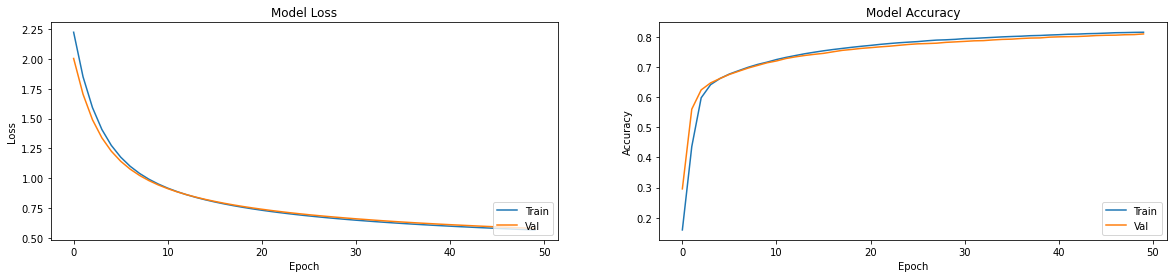

313/313 [==============================] - 0s 1ms/step - loss: 0.5918 - acc: 0.8027
Test loss = 0.59
Test accuracy = 0.8

   Actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.2608787e-04 2.6227048e-04 2.3351791e-03 6.0074055e-04 2.4895731e-03
 1.5409623e-01 1.5943982e-03 2.1396586e-01 3.7278797e-02 5.8705086e-01]
(10,)
[9 2 1 ... 8 1 5]


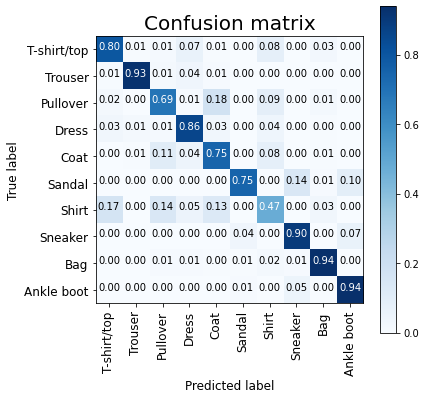

classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1000
           1       0.97      0.93      0.95      1000
           2       0.69      0.69      0.69      1000
           3       0.80      0.86      0.83      1000
           4       0.68      0.75      0.71      1000
           5       0.93      0.75      0.83      1000
           6       0.60      0.47      0.53      1000
           7       0.82      0.90      0.86      1000
           8       0.91      0.94      0.92      1000
           9       0.85      0.94      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [ ]:
# print the loss and accuracy
plot_loss_and_metrics(history_slp)
_, y_pred_proba_slp = load_evaluate_predict('best_model_slp.h5', X_test, y_test, nb_round=0, print_first=1, metrics=METRICS)

print(y_pred_proba_slp[0])
print(y_pred_proba_slp[0].shape)
## Get most likely class
y_pred_slp = np.argmax(y_pred_proba_slp, axis=1)
print(y_pred_slp)

#Confusion Matrix, Classification report, ROC curve
report_metrics(np.argmax(y_test, axis=1), y_pred_slp, y_pred_proba_slp, classes=CLASS_NAMES, multiclass=True)

In [ ]:
#predictions on unseen test data
X_new = X_test[:3]
y_proba = model_slp.predict(X_new)
print(y_proba.round(2))

y_pred = model_slp.predict_classes(X_new)
print(y_pred)

print(np.array(CLASS_NAMES)[y_pred])

[[0.   0.   0.   0.   0.   0.15 0.   0.21 0.04 0.59]
 [0.   0.   0.88 0.   0.02 0.   0.1  0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


AttributeError: ignored

2. Multi-Layer Perceptron 

In [ ]:
#build the MLP model 
def build_mlp_model(height, width, nb_classes, metrics):
    #create the multilayer preceptron model with 4 hidden layers
    model = keras.models.Sequential()
#     model.add(keras.layers.Flatten(input_shape=(height, width)))
    model.add(keras.layers.Dense(256, input_dim=(height* width), activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(nb_classes, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',                           #optimizer=keras.optimizers.SGD(lr=.001),#optimizer='sgd',              
              metrics=metrics)
    return model

model_mlp = build_mlp_model(IMG_HEIGHT, IMG_WIDTH, NUM_CLASSES, METRICS)
model_mlp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 400,906
Trainable params: 400,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mlp.layers

In [ ]:
hidden1 = model_mlp.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(256, 256)
(256,)


In [ ]:
history_mlp = train_model(model_mlp, X_train, y_train, X_valid=X_valid, y_valid=y_valid, data_aug = False, 
            best_model_name='best_model_mlp.h5', epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=VERBOSE)

Training without data augmentation...
Epoch 1/50
48/48 [==============================] - 3s 55ms/step - loss: 0.9937 - acc: 0.6435 - val_loss: 0.6698 - val_acc: 0.7437

Epoch 00001: val_loss improved from inf to 0.66980, saving model to best_model_mlp.h5
Epoch 2/50
48/48 [==============================] - 2s 51ms/step - loss: 0.5983 - acc: 0.7761 - val_loss: 0.4967 - val_acc: 0.8209

Epoch 00002: val_loss improved from 0.66980 to 0.49673, saving model to best_model_mlp.h5
Epoch 3/50
48/48 [==============================] - 2s 52ms/step - loss: 0.5211 - acc: 0.8070 - val_loss: 0.5444 - val_acc: 0.8115

Epoch 00003: val_loss did not improve from 0.49673
Epoch 4/50
48/48 [==============================] - 2s 51ms/step - loss: 0.4684 - acc: 0.8266 - val_loss: 0.4337 - val_acc: 0.8376

Epoch 00004: val_loss improved from 0.49673 to 0.43369, saving model to best_model_mlp.h5
Epoch 5/50
48/48 [==============================] - 2s 51ms/step - loss: 0.4276 - acc: 0.8388 - val_loss: 0.4343 - va

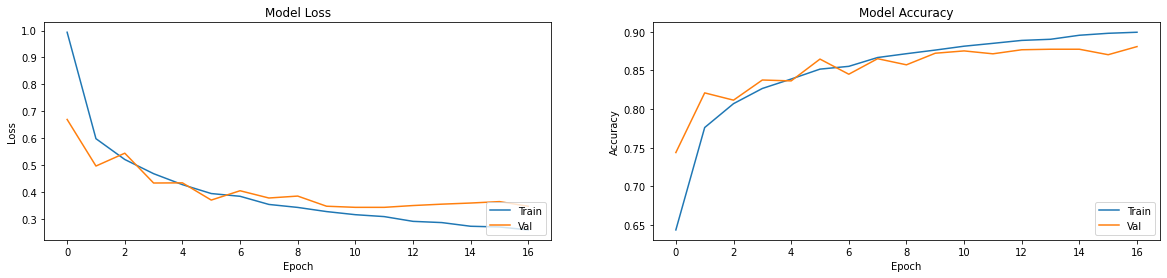

313/313 [==============================] - 1s 2ms/step - loss: 0.3639 - acc: 0.8690
Test loss = 0.36
Test accuracy = 0.87

   Actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[5.3400563e-06 1.5077383e-06 1.8886670e-06 3.6457161e-06 2.9020759e-06
 4.5913989e-03 1.2221552e-05 6.3875644e-03 1.6252621e-05 9.8897725e-01]
(10,)
[9 2 1 ... 8 1 5]


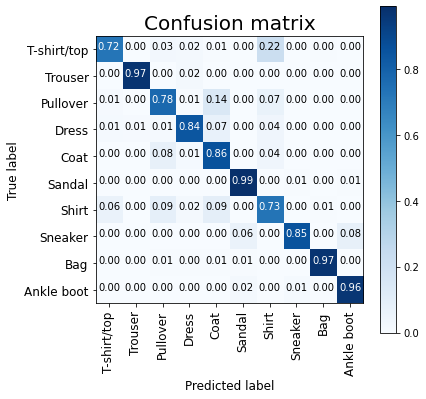

classification report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.78      0.78      1000
           3       0.91      0.84      0.88      1000
           4       0.73      0.86      0.79      1000
           5       0.92      0.99      0.95      1000
           6       0.66      0.73      0.69      1000
           7       0.98      0.85      0.91      1000
           8       0.98      0.97      0.98      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [ ]:
# print the loss and accuracy
plot_loss_and_metrics(history_mlp)
_, y_pred_proba_mlp = load_evaluate_predict('best_model_mlp.h5', X_test, y_test, nb_round=0, print_first=1, metrics=METRICS)

print(y_pred_proba_mlp[0])
print(y_pred_proba_mlp[0].shape)
## Get most likely class
y_pred_mlp = np.argmax(y_pred_proba_mlp, axis=1)
print(y_pred_mlp)

#Confusion Matrix, Classification report, ROC curve
report_metrics(np.argmax(y_test, axis=1), y_pred_mlp, y_pred_proba_mlp, CLASS_NAMES, multiclass=True)

In [ ]:
#predictions on unseen test data
X_new = X_test[:3]
y_proba = model_mlp.predict(X_new)
print(y_proba.round(2))

y_pred = model_mlp.predict_classes(X_new)
print(y_pred)

print(np.array(CLASS_NAMES)[y_pred])

[[0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.98]
 [0.   0.   0.99 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


AttributeError: ignored

CNN...
Convolutional Neural networks are designed to process data through multiple layers of arrays. This type of neural networks is used in applications like image recognition or face recognition. The primary difference between CNN and any other ordinary neural network is that CNN takes input as a two-dimensional array and operates directly on the images rather than focusing on feature extraction which other neural networks focus on.

The dominant approach of CNN includes solutions for problems of recognition. Top companies like Google and Facebook have invested in research and development towards recognition projects to get activities done with greater speed.
A convolutional neural network uses three basic ideas −
-Local respective fields
-Convolution
-Pooling
Let us understand these ideas in detail.
CNN utilizes spatial correlations that exist within the input data. Each concurrent layer of a neural network connects some input neurons. This specific region is called local receptive field. Local receptive field focusses on the hidden neurons. The hidden neurons process the input data inside the mentioned field not realizing the changes outside the specific boundary.
Following is a diagram representation of generating local respective fields −
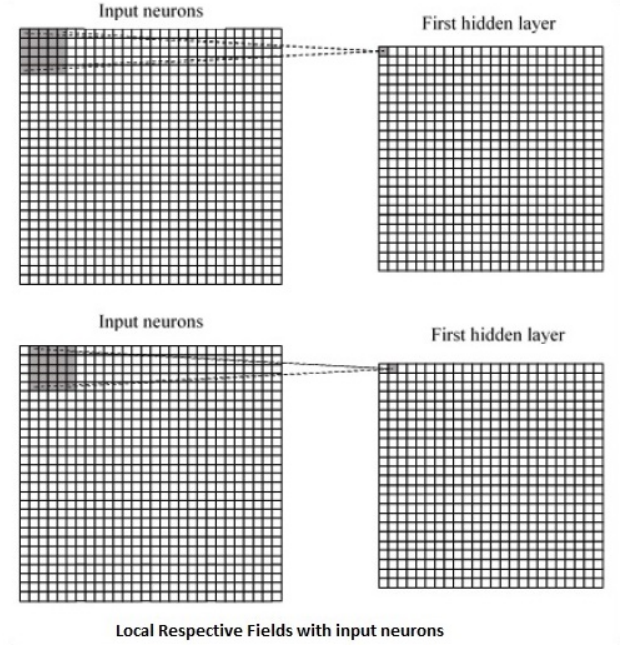
If we observe the above representation, each connection learns a weight of the hidden neuron with an associated connection with movement from one layer to another. Here, individual neurons perform a shift from time to time. This process is called “convolution”.

The mapping of connections from the input layer to the hidden feature map is defined as “shared weights” and bias included is called “shared bias”.

CNN or convolutional neural networks use pooling layers, which are the layers, positioned immediately after CNN declaration. It takes the input from the user as a feature map that comes out of convolutional networks and prepares a condensed feature map. Pooling layers helps in creating layers with neurons of previous layers.


In [ ]:
#Creating CNN model 
def create_simple_conv_model(image_height=IMG_HEIGHT, image_width=IMG_WIDTH, channels=CHANNELS, nb_classes=NUM_CLASSES, metrics=METRICS, optimizer='adam'):    
    # number of convolutional filters to use
    nb_filters = 32   
    # convolution kernel size
    nb_conv = 3
     # size of pooling area for max pooling
    nb_pool = 2
    model = Sequential()
    model.add(Conv2D(filters=nb_filters, kernel_size=(nb_conv,nb_conv), strides=(1, 1), activation='relu', input_shape=(image_height, image_width, channels)))  
    model.add(BatchNormalization())    
    model.add(MaxPool2D(pool_size=(nb_pool,nb_pool)))   
#     model.add(Dropout(0.5))   

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))    
#     model.add(Dropout(0.5))
    
    model.add(Dense(nb_classes, activation='softmax'))   
        
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)
    return model

model_cnn = create_simple_conv_model(IMG_HEIGHT, IMG_WIDTH, CHANNELS, NUM_CLASSES, METRICS)
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 694,090
Trainable params: 694,026
Non-trainable params: 64
_______________________________________________

In [ ]:
history_cnn = train_model(model_cnn, X_train_cnn, y_train_cnn, X_valid=X_valid_cnn, y_valid=y_valid_cnn, data_aug = False, 
            best_model_name='best_model_cnn.h5', epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=VERBOSE)

Training without data augmentation...
Epoch 1/50
48/48 [==============================] - 30s 608ms/step - loss: 0.5620 - acc: 0.8095 - val_loss: 1.7298 - val_acc: 0.8079

Epoch 00001: val_loss improved from inf to 1.72983, saving model to best_model_cnn.h5
Epoch 2/50
48/48 [==============================] - 29s 599ms/step - loss: 0.2990 - acc: 0.8932 - val_loss: 1.5979 - val_acc: 0.8656

Epoch 00002: val_loss improved from 1.72983 to 1.59788, saving model to best_model_cnn.h5
Epoch 3/50
48/48 [==============================] - 29s 604ms/step - loss: 0.2437 - acc: 0.9127 - val_loss: 1.4122 - val_acc: 0.8553

Epoch 00003: val_loss improved from 1.59788 to 1.41219, saving model to best_model_cnn.h5
Epoch 4/50
48/48 [==============================] - 29s 599ms/step - loss: 0.2172 - acc: 0.9214 - val_loss: 1.2272 - val_acc: 0.8672

Epoch 00004: val_loss improved from 1.41219 to 1.22718, saving model to best_model_cnn.h5
Epoch 5/50
48/48 [==============================] - 29s 601ms/step - l

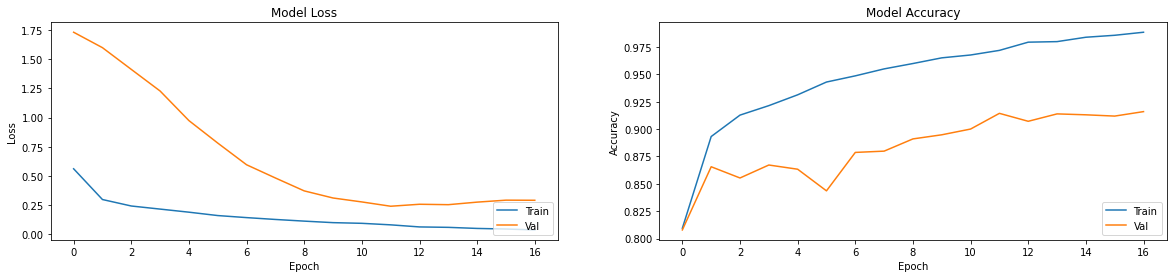

313/313 [==============================] - 3s 8ms/step - loss: 0.2542 - acc: 0.9103
Test loss = 0.25
Test accuracy = 0.91

   Actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[4.0815550e-07 1.4993374e-06 2.7217609e-05 2.1689308e-08 3.2503543e-08
 1.4819892e-03 1.3798127e-06 2.1335098e-03 1.1976822e-04 9.9623424e-01]
(10,)
[9 2 1 ... 8 1 5]


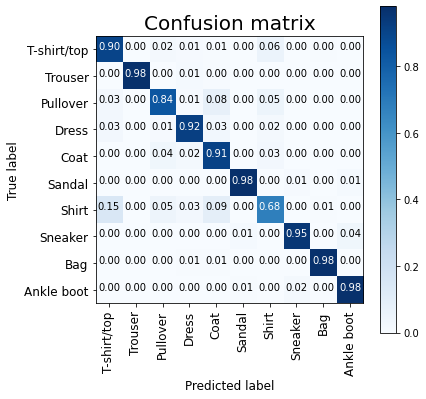

classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.84      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.81      0.91      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.68      0.74      1000
           7       0.97      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# print the loss and accuracy
plot_loss_and_metrics(history_cnn)
_, y_pred_proba_cnn=  load_evaluate_predict('best_model_cnn.h5', X_test_cnn, y_test, nb_round=0, print_first=1, metrics=METRICS)

print(y_pred_proba_cnn[0])
print(y_pred_proba_cnn[0].shape)
## Get most likely class
y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)
print(y_pred_cnn)

#Confusion Matrix, Classification report, ROC curve
report_metrics(np.argmax(y_test, axis=1), y_pred_cnn, y_pred_proba_cnn, CLASS_NAMES, multiclass=True)

In [ ]:
#predictions on unseen test data
X_new = X_test_cnn[:3]
y_proba = model_cnn.predict(X_new)
print(y_proba.round(2))

y_pred = model_cnn.predict_classes(X_new)
print(y_pred)

print(np.array(CLASS_NAMES)[y_pred])

In [ ]:
# create model
model = KerasClassifier(build_fn=create_simple_conv_model, verbose=0)

# grid search epochs, batch size and optimizer
optimizers = ['adam', 'rmsprop', 'SGD']
# init = ['glorot_uniform', 'normal', 'uniform']
epochs = [10, 30, 50]
batches = [500, 1000, 5000]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_cnn, y_train_cnn)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

The KMeans class has many parameters that can be used, but we will be using these three:

init: Initialization method of the centroids.
Value will be: "k-means++"
k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4 ( we have 10 classes but can be divided into 4 broader classes)
n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.


In [ ]:
(x_train, y_train),(x_test, y_test)=tensorflow.keras.datasets.fashion_mnist.load_data()
x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
print(x.shape)
x=x_train.reshape((x_train.shape[0],-1))
x=np.divide(x.astype(float),255)
kmeans = KMeans(n_clusters = 10)
kmeans.fit(x)
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]      
    return inferred_labels  
def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels
n_clusters=10
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(x)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y_train[:20])
from sklearn import metrics

def calculate_metrics(estimator, data, labels):   
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    
    
clusters = [10]
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(x)
    calculate_metrics(estimator, x, y_train)
    cluster_labels = infer_cluster_labels(estimator, y_train)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    print('KMeans Accuracy: {}\n'.format(metrics.accuracy_score(y_train, predicted_Y)))
#Normalizing
x_train=x_train.reshape(-1,28,28,1)/255
x_test=x_test.reshape(-1,28,28,1)/255
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=123)

(70000, 28, 28)
[9 0 6 6 1 2 7 2 5 5 0 9 7 5 7 9 1 0 2 6]
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
Homogeneity: 0.4795223236357675
Inertia: 1982856.8053682756
Number of Clusters: 10
KMeans Accuracy: 0.5469333333333334



In [ ]:
#buiding teh Kmeans model
model = Sequential()
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))
model.compile(optimizer=SGD(0.01,0.9), loss="mse", metrics=['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 14)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 7)         889       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 7)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 7)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 7)          

In [ ]:
history_AE=model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_validate, x_validate), verbose=1)

Epoch 1/10
188/188 [==============================] - 72s 377ms/step - loss: 0.0698 - accuracy: 0.4941 - val_loss: 0.0638 - val_accuracy: 0.5016
Epoch 2/10
188/188 [==============================] - 71s 376ms/step - loss: 0.0466 - accuracy: 0.4985 - val_loss: 0.0539 - val_accuracy: 0.5017
Epoch 3/10
188/188 [==============================] - 71s 376ms/step - loss: 0.0424 - accuracy: 0.4997 - val_loss: 0.0470 - val_accuracy: 0.5020
Epoch 4/10
188/188 [==============================] - 70s 374ms/step - loss: 0.0397 - accuracy: 0.5002 - val_loss: 0.0427 - val_accuracy: 0.5023
Epoch 5/10
188/188 [==============================] - 71s 376ms/step - loss: 0.0378 - accuracy: 0.5005 - val_loss: 0.0404 - val_accuracy: 0.5026
Epoch 6/10
188/188 [==============================] - 70s 374ms/step - loss: 0.0363 - accuracy: 0.5007 - val_loss: 0.0379 - val_accuracy: 0.5029
Epoch 7/10
188/188 [==============================] - 70s 374ms/step - loss: 0.0350 - accuracy: 0.5008 - val_loss: 0.0356 - val_ac

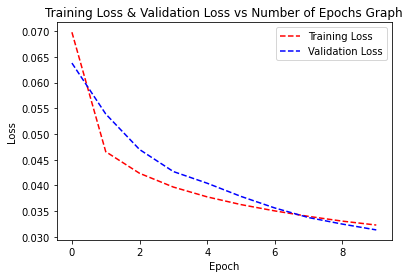

In [ ]:
def lossPlot():
    trainingLoss,=plt.plot(history_AE.history['loss'],"r--")
    validationLoss,=plt.plot(history_AE.history['val_loss'],"b--")
    q=plt.legend([trainingLoss,validationLoss],["Training Loss","Validation Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss & Validation Loss vs Number of Epochs Graph")
    plt.show()
lossPlot()

In [ ]:
encoder = K.function([model.layers[0].input], [model.layers[4].output])
encoded_images = encoder([x_test])[0].reshape(-1,7*7*7)
kmeans_afterencoder_AE = KMeans(n_clusters=10)
clustered_set_AE = kmeans_afterencoder_AE.fit_predict(encoded_images)
cmKMeans = confusion_matrix(y_test, clustered_set_AE)
print(cmKMeans)

[[ 64   2   3   0  35 543 311   2   1  39]
 [ 16   0   0   0   9  36 221   0   0 718]
 [435   2   4   0 511  21  24   0   0   3]
 [ 38   4   1   0   8 193 267   0   0 489]
 [210   8   4   0 579 129  35   0   0  35]
 [  4   0   1 288   0   0  60 562  85   0]
 [368   3  12   0 272 166 154   4   0  21]
 [  0   0   0 104   0   0   0 895   1   0]
 [ 84 394 356   6  56   4  38  56   0   6]
 [  1   1   1 634   0   1   3  68 291   0]]


Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.


In [ ]:
#build the gaussian mixture model 
gmm = GaussianMixture(n_components=10)
gmm.fit(encoded_images)
labelsGMM=gmm.predict(encoded_images)
def infer_cluster_labels_GMM(gmm, actual_labels):
    inferred_labels = {}
    for i in range(gmm.n_components):
        labels = []
        index = np.where(labelsGMM == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels  
def infer_data_labels_GMM(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key                
    return predicted_labels

In [ ]:
cluster_labels_GMM = infer_cluster_labels_GMM(gmm, y_test)
predicted_Y_GMM = infer_data_labels_GMM(labelsGMM, cluster_labels_GMM)
print('Gaussian Mixture Model Clustering Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_Y_GMM)))

In [ ]:
confusionmatrix_GMM = confusion_matrix(y_test, labelsGMM)
print(confusionmatrix_GMM)